**To predict the price of the Diamond**

This notebook will be contains below: 

 * get_dummies and LabelEncoder used for categorical variables
 
     * get_dummies for non ordinal or for values without distance/comparison needed
     * LabelEncoder for ordinal values or variables that have some kind of rankings
 * Use of LinearRegression, KNeighbors Regressor, DecisionTreeRegressor     

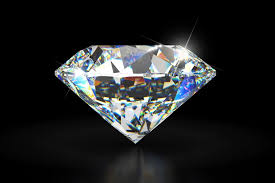

In [1]:
# Print all outputs in a block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Standard Imports
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import svm

In [3]:
df_diamond = pd.read_csv("../Beginner_Dataset/beginner_datasets/diamond.csv")
df_diamond.head(10)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
6,1.00,Very Good,D,SI1,VG,G,GIA,5747
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
8,2.11,Ideal,H,SI1,VG,VG,GIA,18609
9,1.05,Very Good,E,VS1,VG,G,GIA,7666


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
6,1.00,Very Good,D,SI1,VG,G,GIA,5747
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
8,2.11,Ideal,H,SI1,VG,VG,GIA,18609
9,1.05,Very Good,E,VS1,VG,G,GIA,7666


**Attribute Information**

Carat Weight: in grams

Cut: how good the cut is

Color: the color of the diamond

Clarity: diamond clarity rating

Polish: diamond polish rating

Symmetry: diamond symmetry rating

Report: which company has graded the diamond

Price: in US dollars

In [4]:
df_diamond.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


**Replace object values with numeric values**

In [5]:
labelencoder = LabelEncoder()
df_diamond['Report'] = pd.get_dummies(df_diamond,columns=["Report"]).values
df_diamond['Cut'] = labelencoder.fit_transform(df_diamond['Cut'])
df_diamond['Color'] = labelencoder.fit_transform(df_diamond['Color'])
df_diamond['Clarity'] = labelencoder.fit_transform(df_diamond['Clarity'])
df_diamond['Polish'] = labelencoder.fit_transform(df_diamond['Polish'])
df_diamond['Symmetry'] = labelencoder.fit_transform(df_diamond['Symmetry'])
df_diamond.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,1.1,5169
1,0.83,2,4,3,2,2,0.83,3470
2,0.85,2,4,2,0,0,0.85,3183
3,0.91,2,1,2,3,3,0.91,4370
4,0.83,2,3,2,0,0,0.83,3171


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,1.1,5169
1,0.83,2,4,3,2,2,0.83,3470
2,0.85,2,4,2,0,0,0.85,3183
3,0.91,2,1,2,3,3,0.91,4370
4,0.83,2,3,2,0,0,0.83,3171


Let's check for null values

In [6]:
df_diamond.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [7]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   int32  
 2   Color         6000 non-null   int32  
 3   Clarity       6000 non-null   int32  
 4   Polish        6000 non-null   int32  
 5   Symmetry      6000 non-null   int32  
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int32(5), int64(1), object(1)
memory usage: 257.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   int32  
 2   Color         6000 non-null   int32  
 3   Clarity       6000 non-null   int32  
 4   Polish        6000 no

Let's check whether the company reporting('Report) on the diamonds affects their value

Text(0.5, 1.0, 'Reporting Companies Price Comparison')

Text(0.5, 1.0, 'Reporting Companies Price Comparison')

Text(0.5, 0, 'Reporting Company')

Text(0.5, 0, 'Reporting Company')

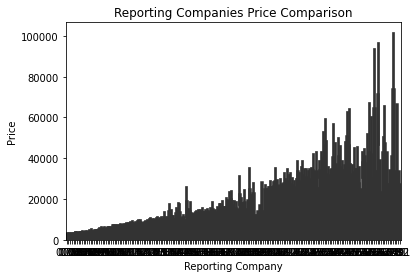

0=GIA, 1=AGSL


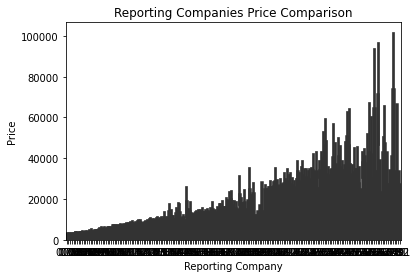

0=GIA, 1=AGSL


In [8]:
check = sns.barplot(x=df_diamond['Report'],y=df_diamond['Price'],data=df_diamond,linewidth=2.5,
                    color="salmon",errcolor=".2",edgecolor=".2")
plt.title('Reporting Companies Price Comparison')
plt.xlabel("Reporting Company")
plt.show()
print('0=GIA, 1=AGSL')

Let's delete the report column, since it has no significance

In [9]:
df_diamond=df_diamond.drop(labels="Report",axis=1)

**Correlation chart**

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

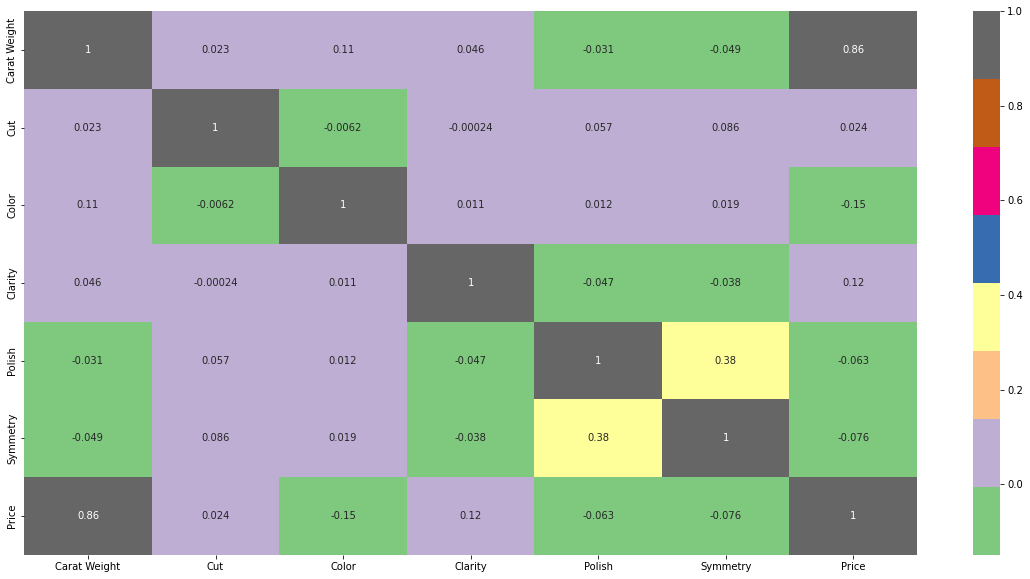

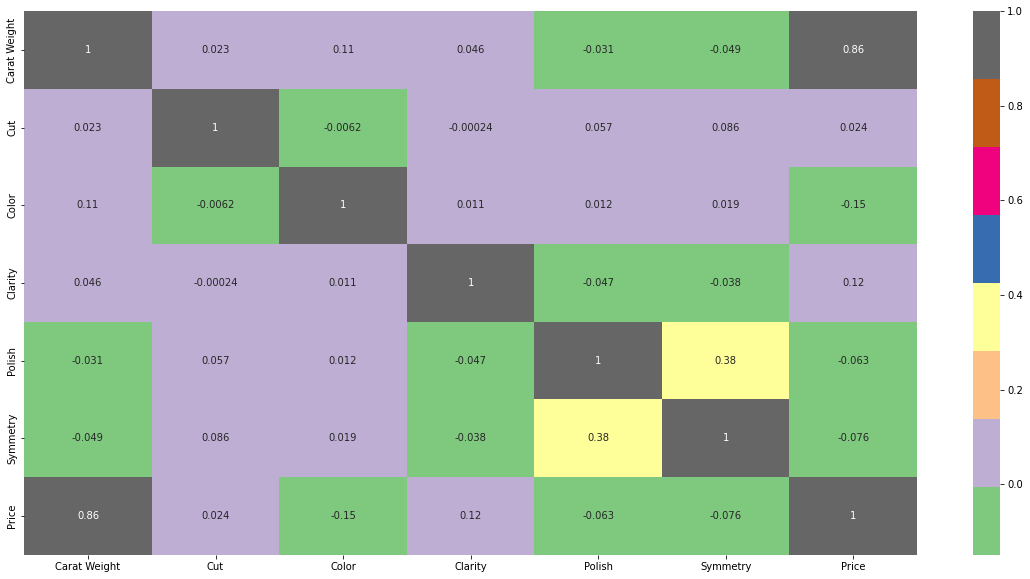

In [10]:
plt.figure(figsize = (20,10))
c = df_diamond.corr()
sns.heatmap(c,cmap="Accent",annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Carat Weight'}>,
        <AxesSubplot:title={'center':'Cut'}>,
        <AxesSubplot:title={'center':'Color'}>],
       [<AxesSubplot:title={'center':'Clarity'}>,
        <AxesSubplot:title={'center':'Polish'}>,
        <AxesSubplot:title={'center':'Symmetry'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

array([[<AxesSubplot:title={'center':'Carat Weight'}>,
        <AxesSubplot:title={'center':'Cut'}>,
        <AxesSubplot:title={'center':'Color'}>],
       [<AxesSubplot:title={'center':'Clarity'}>,
        <AxesSubplot:title={'center':'Polish'}>,
        <AxesSubplot:title={'center':'Symmetry'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

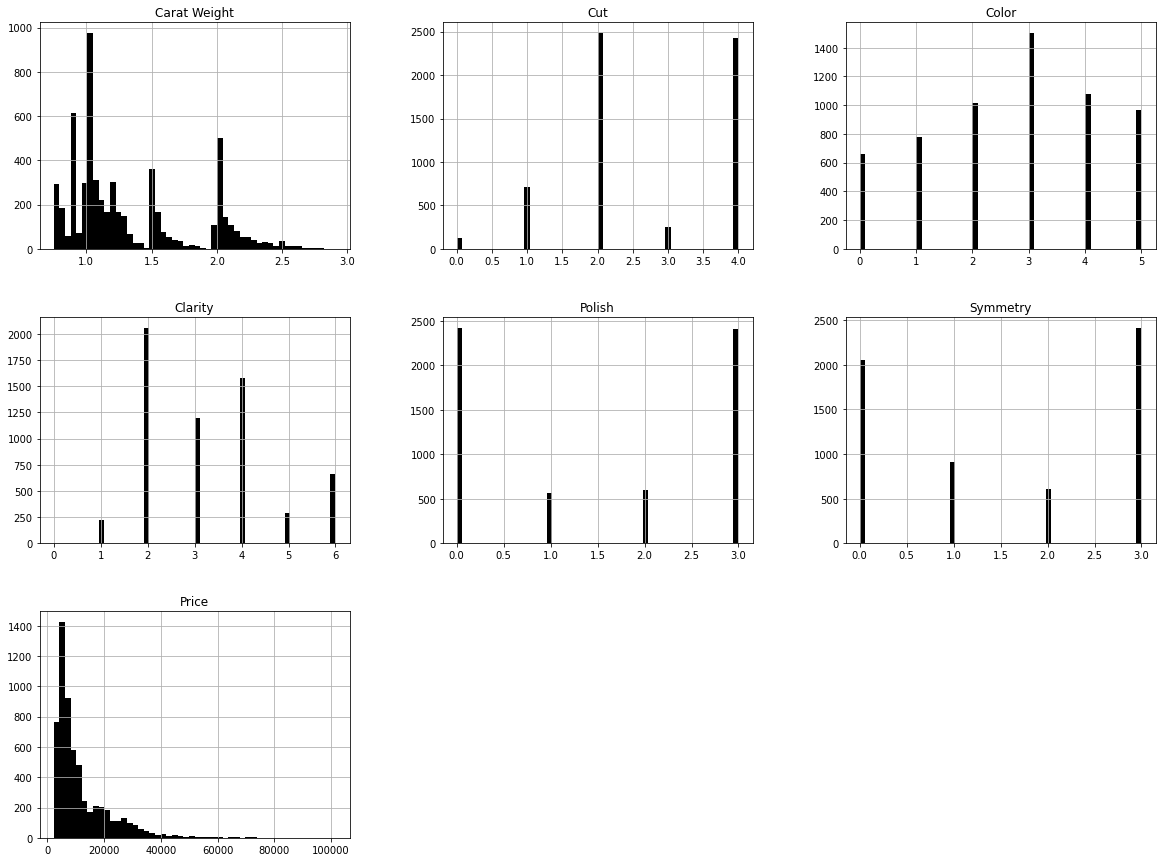

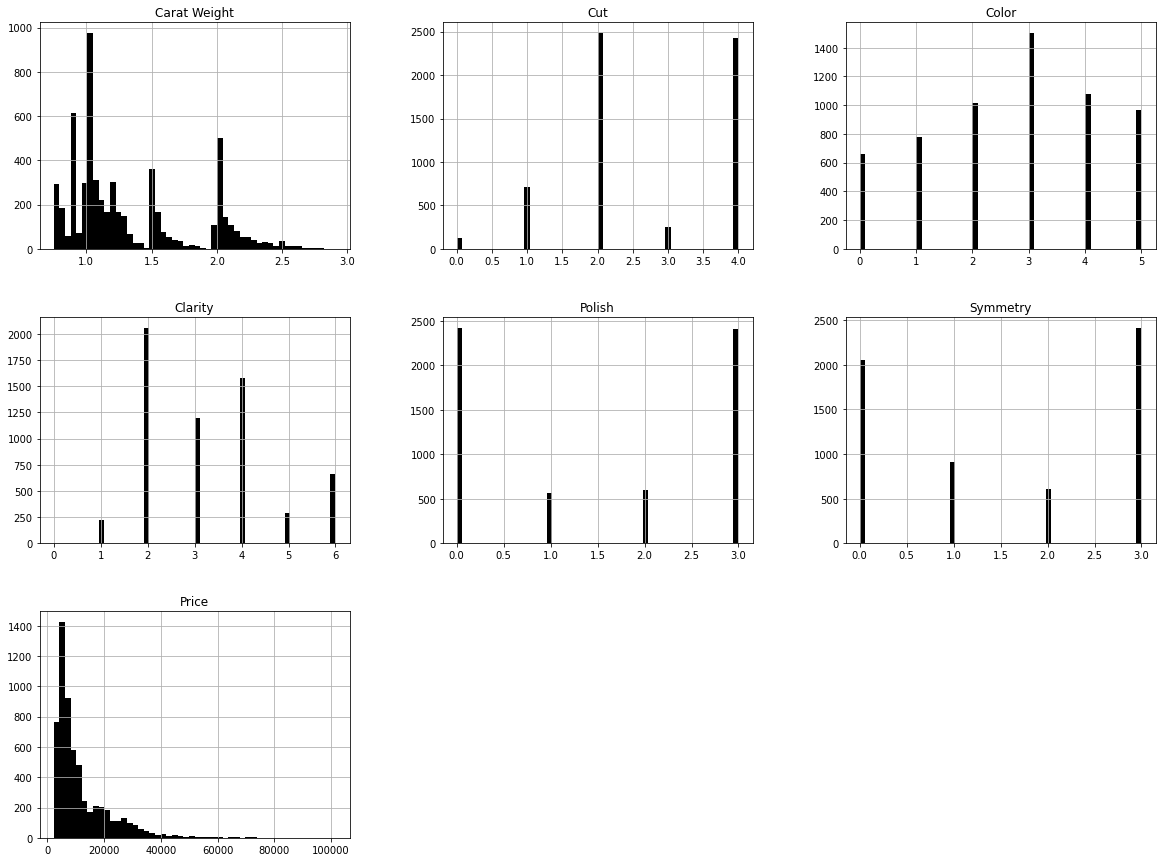

In [11]:
df_diamond.hist(bins=50,figsize=(20,15),color='Black')
plt.show()

**Diamonds cut chart**

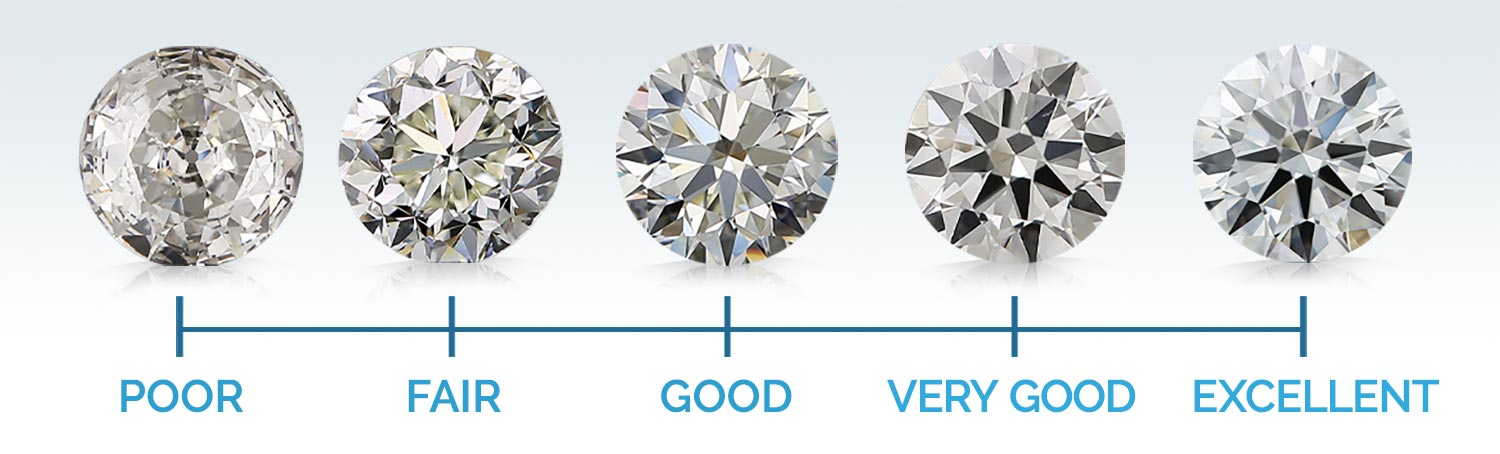

<AxesSubplot:xlabel='Cut', ylabel='Price'>

<AxesSubplot:xlabel='Cut', ylabel='Price'>

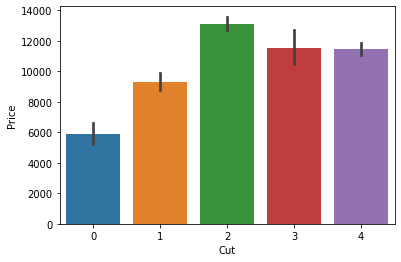

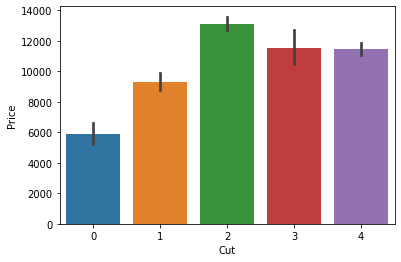

In [12]:
sns.barplot(x='Cut',y='Price',data=df_diamond)
plt.show()

0 = fair 1 = good 2 = ideal 3 = signature ideal 4 = very good

**Diamonds clarity chart**

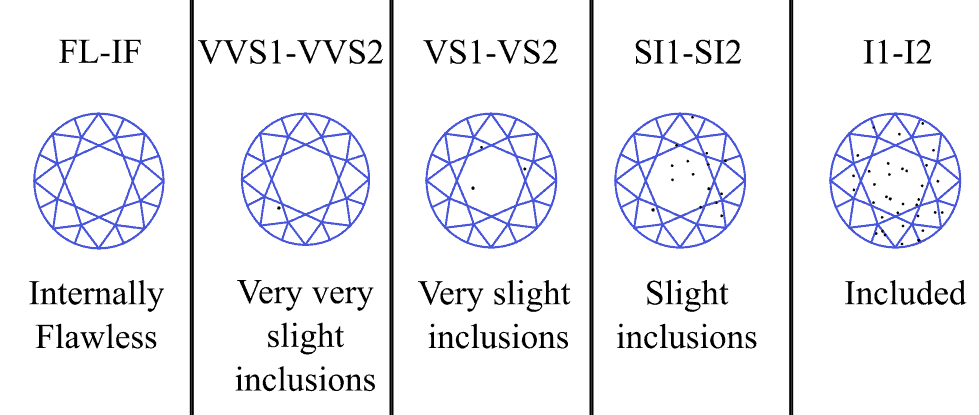

<AxesSubplot:xlabel='Clarity', ylabel='Price'>

<AxesSubplot:xlabel='Clarity', ylabel='Price'>

Text(0.5, 1.0, 'Clarity - Price Correlation')

Text(0.5, 1.0, 'Clarity - Price Correlation')

Text(0.5, 0, 'Clarity Ranking')

Text(0.5, 0, 'Clarity Ranking')

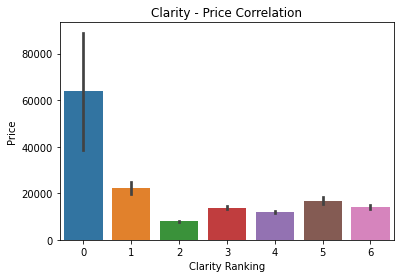

0 = FL 1 = IF 2 = SI1 3 = VS1 4 = VS2 5 = VVS1 6 = VVS2


2    2059
4    1575
3    1192
6     666
5     285
1     219
0       4
Name: Clarity, dtype: int64

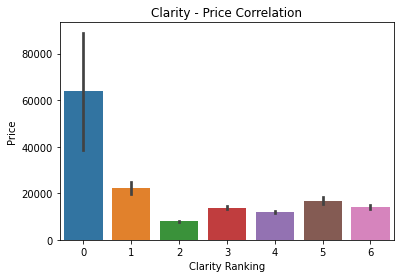

0 = FL 1 = IF 2 = SI1 3 = VS1 4 = VS2 5 = VVS1 6 = VVS2


2    2059
4    1575
3    1192
6     666
5     285
1     219
0       4
Name: Clarity, dtype: int64

In [13]:
sns.barplot(x='Clarity',y='Price',data=df_diamond)
plt.title("Clarity - Price Correlation")
plt.xlabel("Clarity Ranking")
plt.show()
print('0 = FL','1 = IF','2 = SI1','3 = VS1','4 = VS2','5 = VVS1','6 = VVS2')
df_diamond['Clarity'].value_counts()

Although the 4 diamonds rated 0 (=Flawless) for clarity have significantly higher prices, since there are only 4 of them they don't affect the data analysis and models. Therefore I didn't remove them from the data. They aren't outliers, since their prices (behavior) match their group's.

**One carat diamond weighs 0.2 grams**

Text(0.5, 1.0, 'Carat Weight')

Text(0.5, 1.0, 'Carat Weight')

Text(0.5, 0, 'Carat Weight in Grams')

Text(0.5, 0, 'Carat Weight in Grams')

Text(0, 0.5, 'Price')

Text(0, 0.5, 'Price')

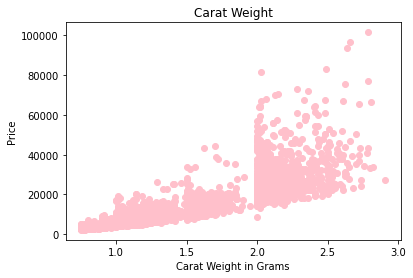

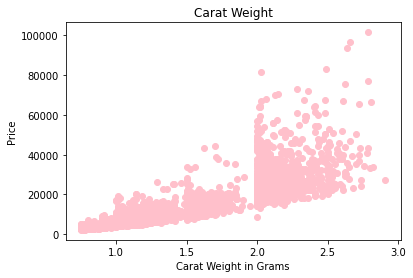

In [14]:
plt.scatter(df_diamond['Carat Weight'],df_diamond['Price'],color='Pink')
plt.title('Carat Weight')
plt.xlabel('Carat Weight in Grams')
plt.ylabel('Price')
plt.show()

**Diamonds color chart**

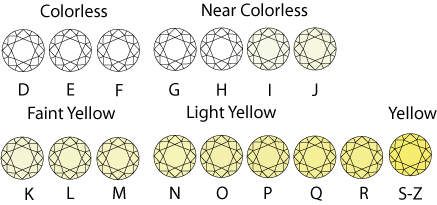

<AxesSubplot:xlabel='Color', ylabel='Price'>

<AxesSubplot:xlabel='Color', ylabel='Price'>

Text(0.5, 1.0, 'Color - Price Correlation')

Text(0.5, 1.0, 'Color - Price Correlation')

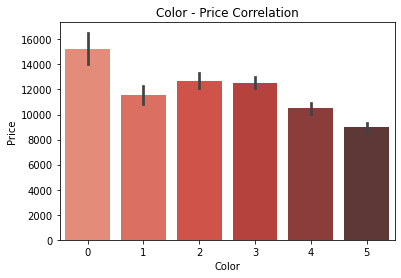

0 = D 1 = E 2 = F 3 = G 4 = H 5 = I


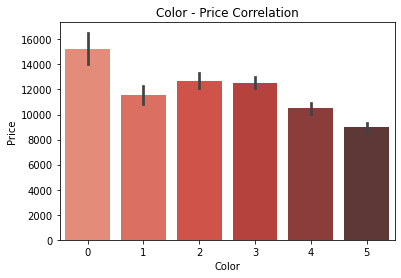

0 = D 1 = E 2 = F 3 = G 4 = H 5 = I


In [15]:
sns.barplot(x=df_diamond['Color'],y=df_diamond['Price'],palette="Reds_d")
plt.title('Color - Price Correlation')
plt.show()
print('0 = D','1 = E','2 = F','3 = G','4 = H','5 = I')

**Diamonds symmetry chart**

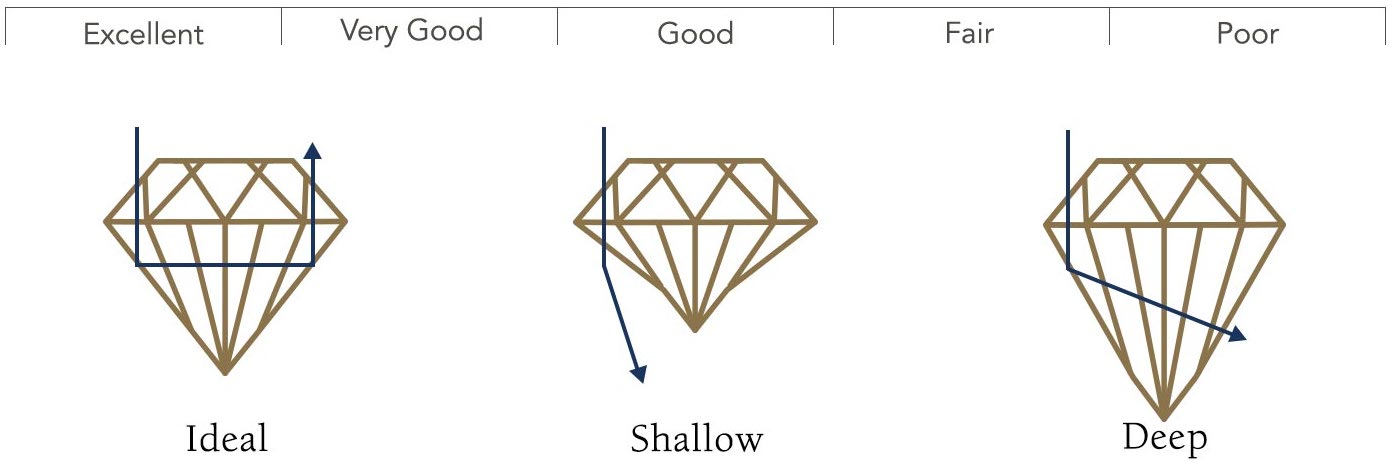

Text(0.5, 1.0, 'Symmetry')

Text(0.5, 1.0, 'Symmetry')

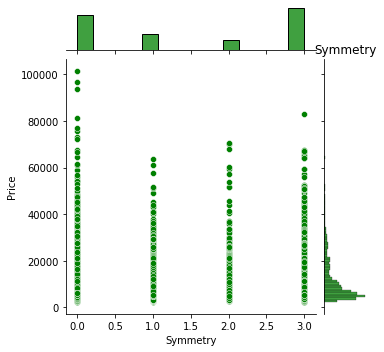

0 = excellent 1 = good 2 = ideal 3 = very good


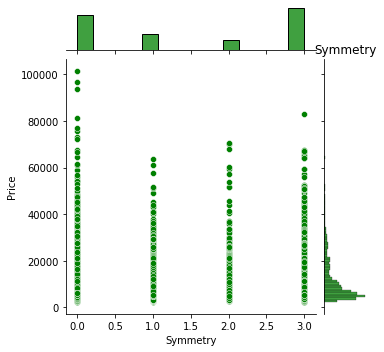

0 = excellent 1 = good 2 = ideal 3 = very good


In [16]:
sns.jointplot(x='Symmetry',y='Price',data=df_diamond,height=5,color='Green')
plt.title('Symmetry')
plt.show()
print('0 = excellent','1 = good','2 = ideal','3 = very good')

Text(0.5, 1.0, 'Polish')

Text(0.5, 1.0, 'Polish')

Text(0.5, 6.79999999999999, 'Polish Ranking')

Text(0.5, 6.79999999999999, 'Polish Ranking')

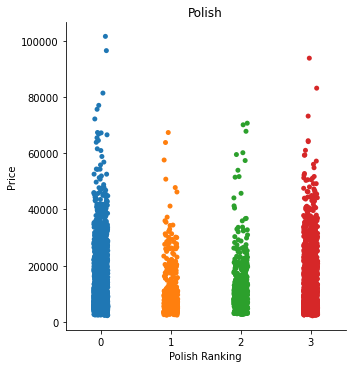

0 = excellent 1 = good 2 = ideal 3 = very good


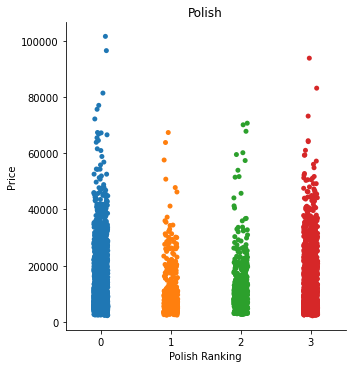

0 = excellent 1 = good 2 = ideal 3 = very good


In [17]:
sns.catplot(x="Polish",y="Price",data=df_diamond)
plt.title('Polish')
plt.xlabel('Polish Ranking')
plt.show()
print('0 = excellent','1 = good','2 = ideal','3 = very good')

**Divide data into training and testing sets**

In [19]:
X = df_diamond.drop('Price',axis=1)
y = df_diamond.Price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X.head()
y.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry
0,1.10,2,4,2,3,0
1,0.83,2,4,3,2,2
2,0.85,2,4,2,0,0
3,0.91,2,1,2,3,3
4,0.83,2,3,2,0,0


0    5169
1    3470
2    3183
3    4370
4    3171
Name: Price, dtype: int64

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry
0,1.10,2,4,2,3,0
1,0.83,2,4,3,2,2
2,0.85,2,4,2,0,0
3,0.91,2,1,2,3,3
4,0.83,2,3,2,0,0


0    5169
1    3470
2    3183
3    4370
4    3171
Name: Price, dtype: int64

**Linear Regression**

In [21]:
regr_LR = LinearRegression()
regr_LR.fit(X_train,y_train)
lin_pred = regr_LR.predict(X_test)

LinearRegression()

LinearRegression()

**Let's check the Linear Regression's results**

In [22]:
print("MAE:",mean_absolute_error(y_test,lin_pred))
lin_Model = LinearRegression().fit(X_train,y_train)
print("Score: ",lin_Model.score(X_train,y_train))
lin_scores = cross_val_score(lin_Model,X,y,cv=5)
print("Cross Validation scores mean:",lin_scores.mean())

MAE: 2800.523891794341
Score:  0.8080536852228017
Cross Validation scores mean: 0.8070638819293171
MAE: 2800.523891794341
Score:  0.8080536852228017
Cross Validation scores mean: 0.8070638819293171


**KNN**

**K = 2**

In [23]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=2)

**Let's look at a range of k values**

KNeighborsRegressor(n_neighbors=1)

KNeighborsRegressor(n_neighbors=1)

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=4)

KNeighborsRegressor(n_neighbors=4)

KNeighborsRegressor()

KNeighborsRegressor()

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=8)

KNeighborsRegressor(n_neighbors=8)

KNeighborsRegressor(n_neighbors=9)

KNeighborsRegressor(n_neighbors=9)

KNeighborsRegressor(n_neighbors=10)

KNeighborsRegressor(n_neighbors=10)

KNeighborsRegressor(n_neighbors=11)

KNeighborsRegressor(n_neighbors=11)

KNeighborsRegressor(n_neighbors=12)

KNeighborsRegressor(n_neighbors=12)

KNeighborsRegressor(n_neighbors=13)

KNeighborsRegressor(n_neighbors=13)

KNeighborsRegressor(n_neighbors=14)

KNeighborsRegressor(n_neighbors=14)

([<matplotlib.axis.XTick at 0x207cb9760b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'K value')

([<matplotlib.axis.XTick at 0x207cb9760b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'K value')

Text(0, 0.5, 'Score')

Text(0, 0.5, 'Score')

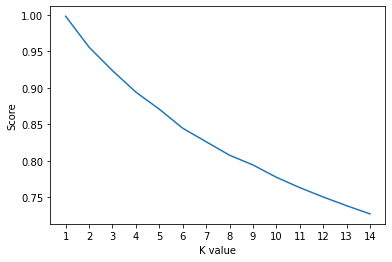

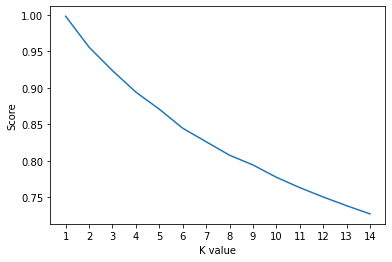

In [24]:
arr = []
for i in range(1,15):
    knn_k = KNeighborsRegressor(n_neighbors=i)
    knn_k.fit(X_train,y_train)
    knn_k_model = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    arr.append(knn_k_model.score(X_train,y_train))
    
plt.plot(range(1,15), arr)
plt.xticks(np.arange(1,15,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

**Let's check the KNN Regressor's results**

In [27]:
knn_scores = cross_val_score(knn, X, y, cv=4)
knn_model = KNeighborsRegressor(n_neighbors = 2).fit(X_train,y_train)
print("Cross Validation scores mean:",knn_scores.mean())
print("Score:" , knn_model.score(X_train,y_train))

Cross Validation scores mean: 0.8139672517755854
Score: 0.9558462027069639
Cross Validation scores mean: 0.8139672517755854
Score: 0.9558462027069639


**Decision Tree Regressor**

In [28]:
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
dtr_prediction = model.predict(X_test)

DecisionTreeRegressor(random_state=0)

DecisionTreeRegressor(random_state=0)

In [30]:
print("MAE:", mean_absolute_error(y_test, dtr_prediction))
dtrModel = DecisionTreeRegressor().fit(X_train,y_train)
print("Score: ", dtrModel.score(X_train,y_train))
dtr_scores = cross_val_score(dtrModel, X, y, cv=5)
print("Cross Validation scores mean:", dtr_scores.mean())

MAE: 959.492375
Score:  0.999139775212691
Cross Validation scores mean: 0.9700724999133165
MAE: 959.492375
Score:  0.999139775212691
Cross Validation scores mean: 0.9700724999133165


Text(0.5, 1.0, 'Model Results Comparison')

Text(0.5, 1.0, 'Model Results Comparison')

Text(0.5, 0, 'Model')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Cross Validation Score Mean (%)')

Text(0, 0.5, 'Cross Validation Score Mean (%)')

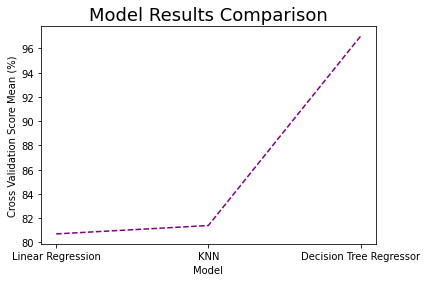

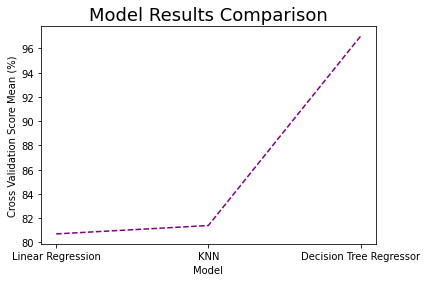

In [31]:
arrX = ['Linear Regression','KNN', 'Decision Tree Regressor']
arrY = [lin_scores.mean()*100,knn_scores.mean()*100, dtr_scores.mean()*100]
plt.plot (arrX, arrY, linestyle='--',color='purple')
plt.title("Model Results Comparison", fontsize = 18)
plt.xlabel("Model")
plt.ylabel("Cross Validation Score Mean (%)")
plt.show()